In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
from matplotlib import style
style.use('fivethirtyeight')

/Users/vu/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
filename_new = "./input_data/activities.csv"
pdPAL = pd.read_csv(filename_new)
del pdPAL['Unnamed: 0']
pdPAL['date'] = pd.to_datetime(pdPAL['date'])

In [3]:
# Convert status to numerical representation
# before_plan = 0
# first_plan = 1
# in_plan = 2
# stay_active = 3
status_ordered = ['before_plan', 'first_plan', 'in_plan', 'stay_active']

pdPAL.status = pdPAL.status.astype("category",
                                   ordered=True,
                                   categories=status_ordered).cat.codes

In [4]:
groupPAL = pdPAL.groupby(['date','status'])
a = groupPAL.count()['pal']
groupDatePAL = pdPAL.groupby(['date']).count()['pal']

In [5]:
dictCount = dict(a)
dictCountTotal = dict(groupDatePAL)

In [6]:
before = []
first = []
inplan = []
stayactive = []
total = []

for (time, c) in dictCountTotal.items():
    total.append((time, c))

In [7]:
for (time, status), c in dictCount.items():
    #print 'Time: ' + str(time) + '\tStatus: ' + str(status) + '\tCount: ' + str(c)
    if status == 0:
        before.append((time, c))
    elif status == 1:
        first.append((time,c))
    elif status == 2:
        inplan.append((time,c))
    elif status == 3:
        stayactive.append((time,c))
    else:
        print 'error: no status information!'

In [8]:
sorted_before = sorted(before, key=lambda tup: tup[0])
sorted_first = sorted(first, key=lambda tup: tup[0])
sorted_inplan = sorted(inplan, key=lambda tup: tup[0])
sorted_stayactive = sorted(stayactive, key=lambda tup: tup[0])
sorted_total = sorted(total, key=lambda tup: tup[0])

In [9]:
#a = [(day,num) for day, num in sorted_first if num > 400]

In [10]:
#a

In [11]:
dictStatus = {'before': dict(sorted_before), 'first' : dict(sorted_first),
              'in_plan' : dict(sorted_inplan), 'stay' : dict(sorted_stayactive)}

In [12]:
df = pd.DataFrame(dictStatus)
df.fillna(0,inplace=True)

dates = list(df.index)
df['date'] = dates
df.index = range(len(df.index))

In [13]:
b = list(df['before'])
f = list(df['first'])
i = list(df['in_plan'])
s = list(df['stay'])
days = list(df['date'])

In [14]:
ind = days
sum_f = b
sum_i = np.array(b)+np.array(f)
sum_s = sum_i+np.array(i)
len(sum_s)

1026

1026
2010-04-28 00:00:00 2010-07-28 00:00:00
91


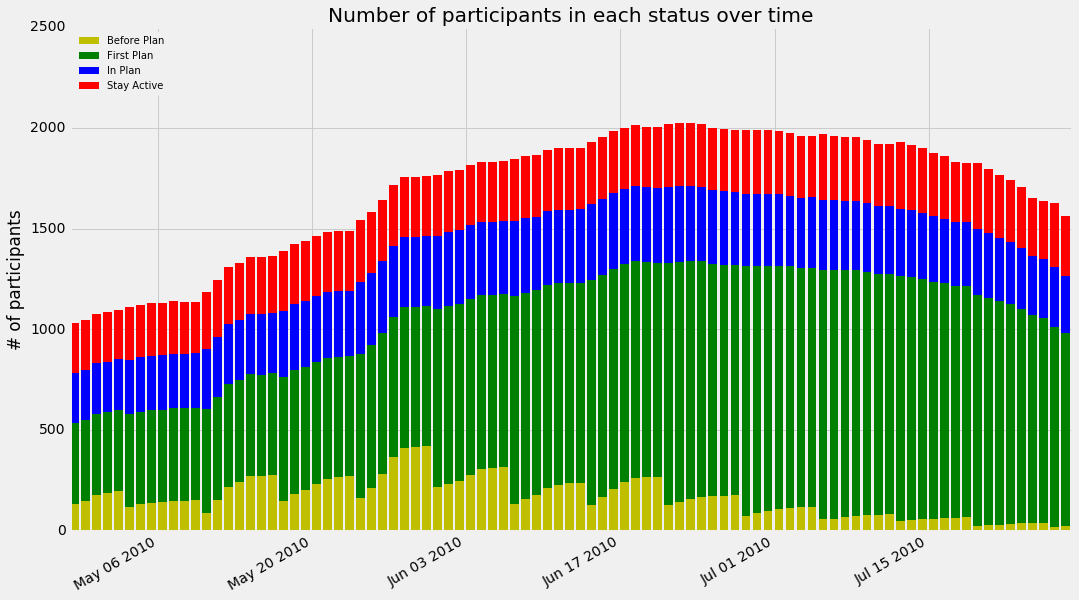

In [15]:
fig = plt.figure(figsize=(16,10))

pb = plt.bar(ind, b, color='y', edgecolor="none")
pf = plt.bar(ind, f, color='g', edgecolor="none",
             bottom=b)
pi = plt.bar(ind, i, color='b', edgecolor="none",
             bottom=sum_i)
ps = plt.bar(ind, s, color='r', edgecolor="none",
             bottom=sum_s)

plt.ylabel('# of participants')
plt.title('Number of participants in each status over time')
init_d = 925
end_d = 1016
#end_d = 1025

plt.xlim(days[init_d],days[end_d])

print len(days)

print days[init_d],days[end_d]
print end_d-init_d
plt.legend(['Before Plan', 'First Plan', 'In Plan', 'Stay Active', 'Total'], loc='upper left', fontsize=10)

#plt.xlabel("Day",fontsize=12)

fig.autofmt_xdate()

fig.savefig('./imgs/barStatusHistory.png', bbox_inches='tight')
